# Análisis de una base de datos de un histórico de ventas de un e-commerce

### Carga de librerías necesarias

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

### Carga de datos

In [61]:
root_path = 'Users/mariofranco/Documents/Diplomado/Modulo4/'
df = pd.read_csv('CreditCard.csv', encoding = "ISO-8859-1")

### Análisis de la data

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8940,C19181,130.838554,1.000000,591.24,0.00,591.24,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,475.523262,82.771320,1.00,6
8941,C19182,5967.475270,0.833333,214.55,0.00,214.55,8555.409326,0.833333,0.000000,0.666667,0.666667,13,5,9000.0,966.202912,861.949906,0.00,6
8942,C19183,40.829749,1.000000,113.28,0.00,113.28,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,94.488828,86.283101,0.25,6
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.00,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [6]:
df.shape

(8950, 18)

In [7]:
df.shape[1]

18

In [8]:
df.columns.values.tolist()

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [9]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [10]:
df.isnull().any().any()

True

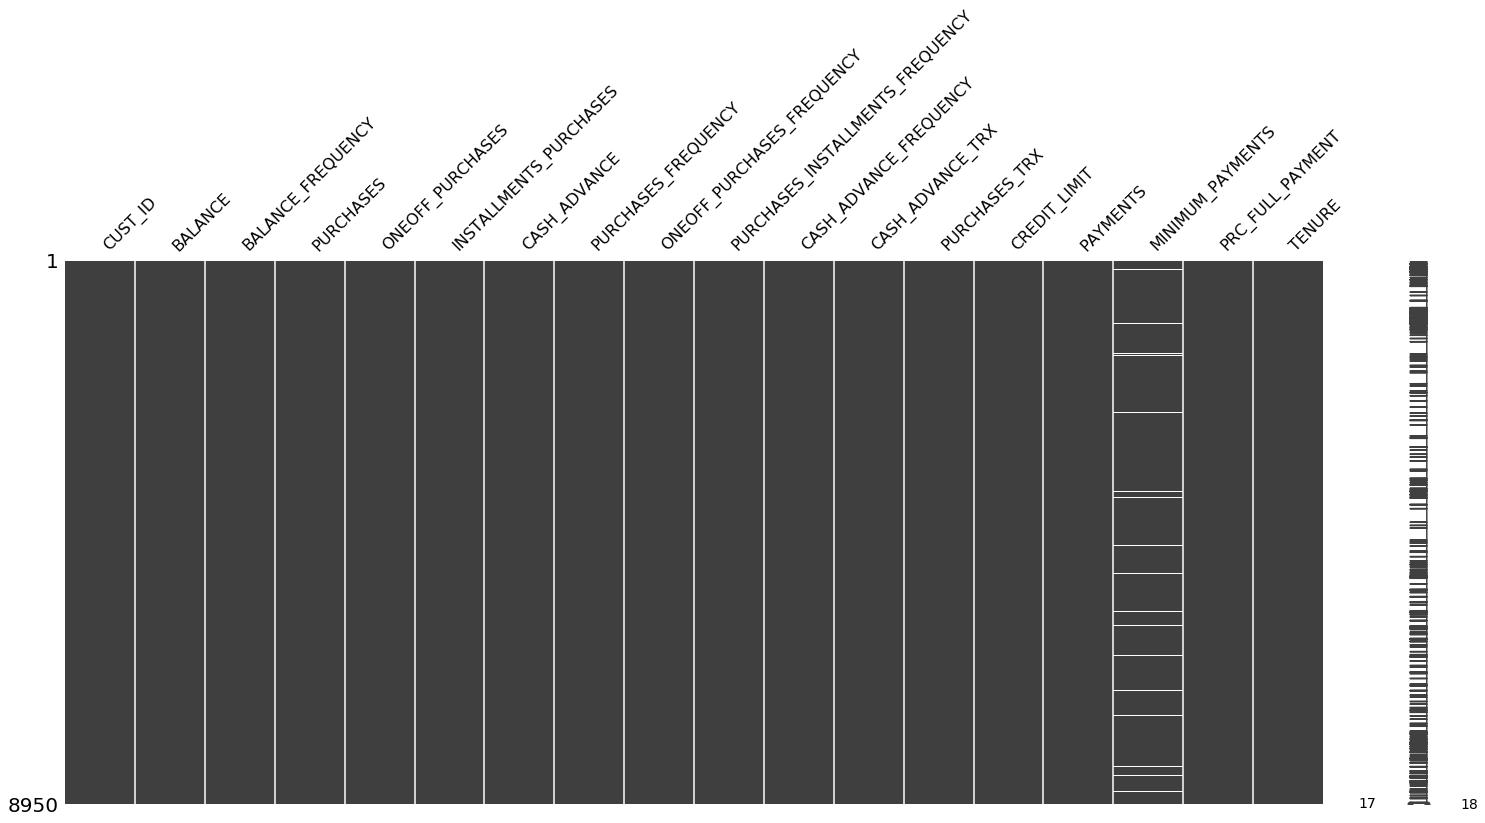

In [11]:
msno.matrix(df)

In [12]:
df.replace({' ': np.nan}, inplace=True)

In [13]:
df.isnull().any().any()

True

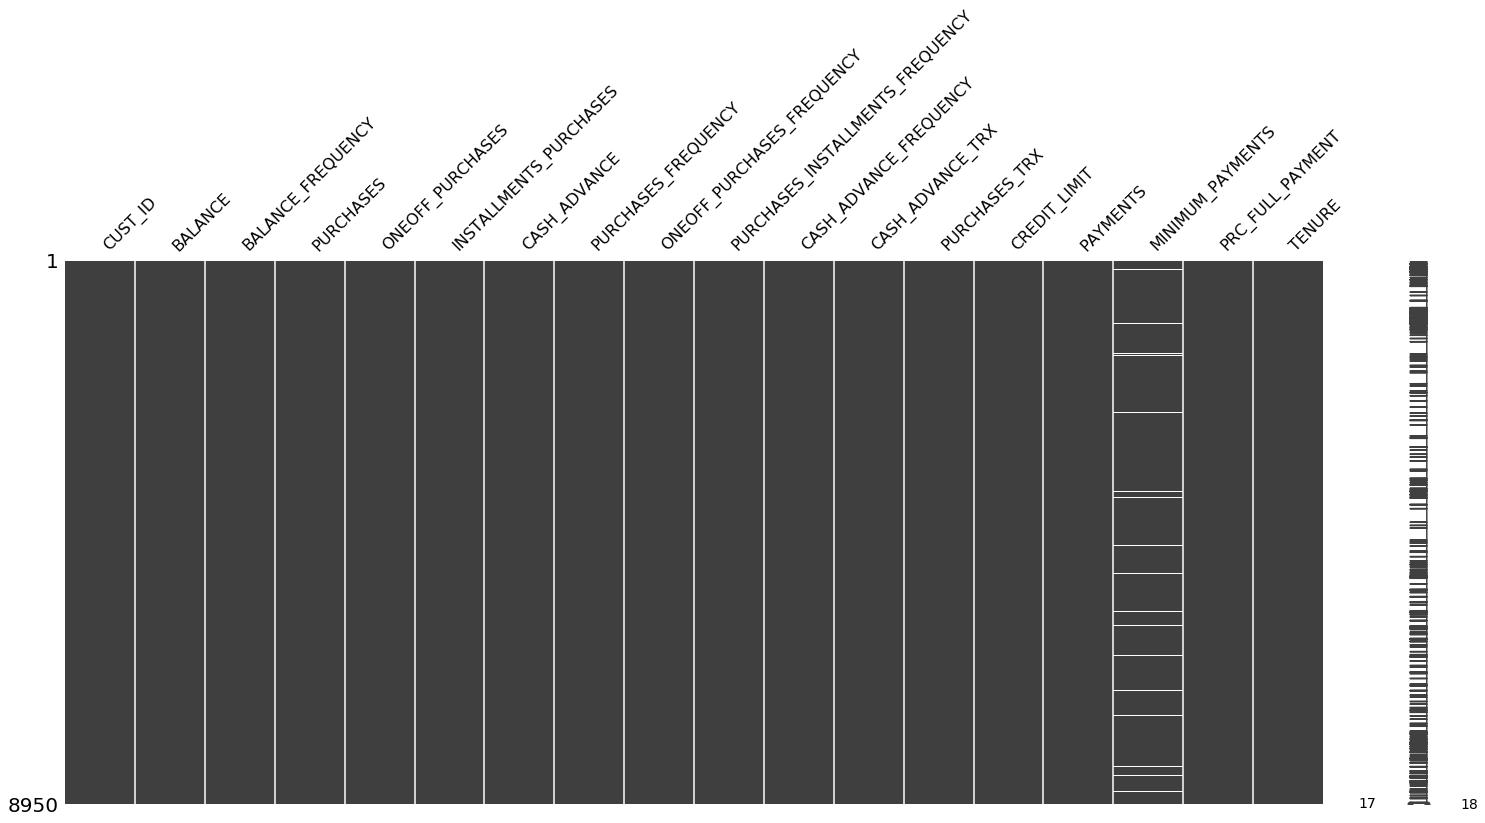

In [14]:
msno.matrix(df)

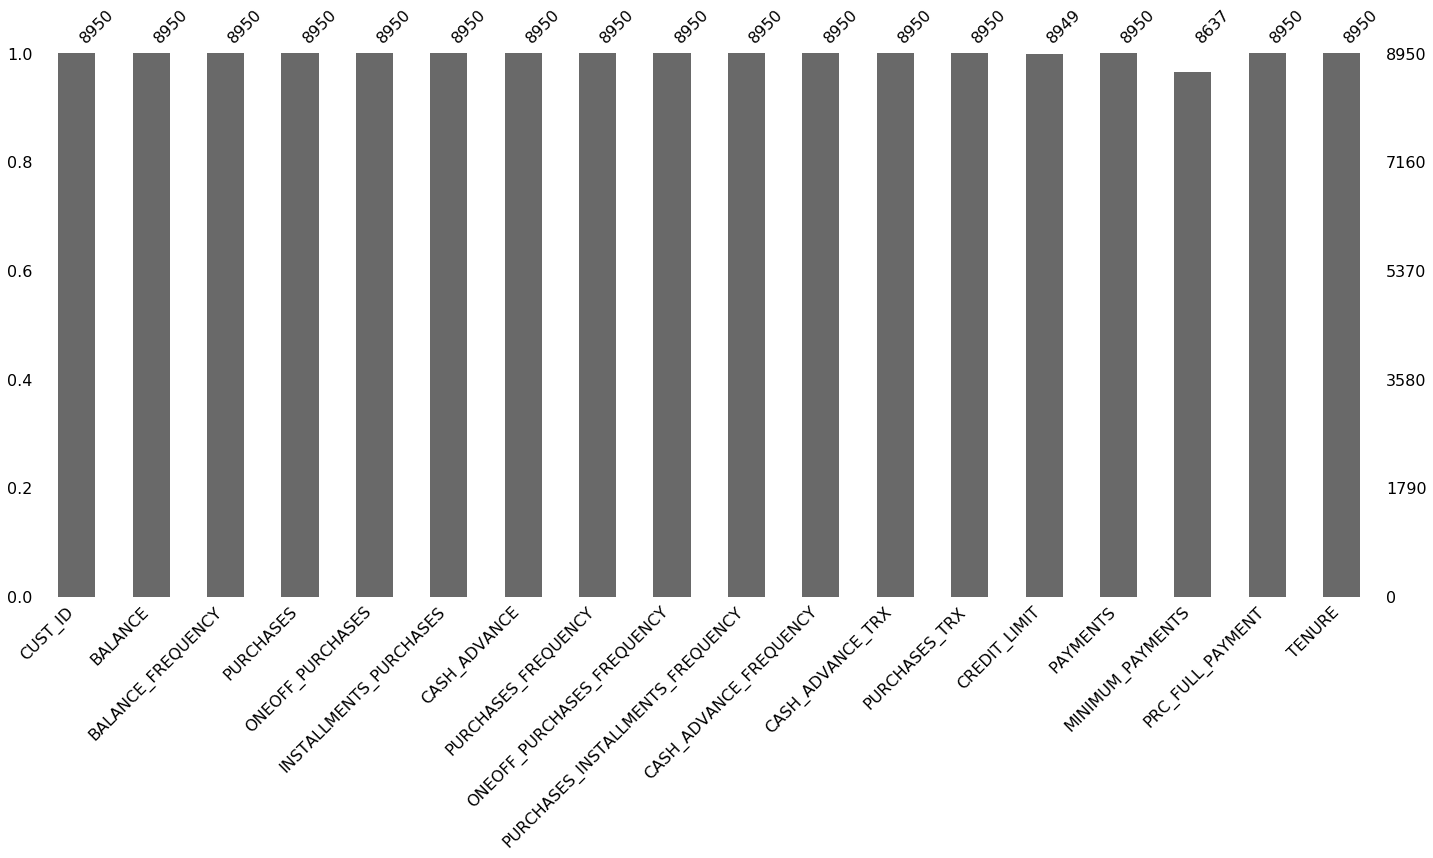

In [15]:
msno.bar(df)

In [16]:
df.columns[df.isnull().any()].tolist()

['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

In [17]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [18]:
df.loc[[0]]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.0,0.166667,0.0,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.0,12


In [19]:
df.BALANCE.loc[[6900]]

6900    1460.077343
Name: BALANCE, dtype: float64

In [20]:
df["BALANCE"].loc[[6900]]

6900    1460.077343
Name: BALANCE, dtype: float64

In [21]:
df[["BALANCE", "CREDIT_LIMIT"]].loc[[0]]

,BALANCE,CREDIT_LIMIT
0,40.900749,1000.0


In [22]:
df.loc[56:60]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
56,C10058,3625.218146,1.000000,313.27,313.27,0.00,668.468743,0.250000,0.250000,0.000000,0.416667,5,4,4000.0,0.000000,NaN,0.000000,12
57,C10059,2386.330629,1.000000,5217.62,4789.09,428.53,0.000000,0.916667,0.916667,0.500000,0.000000,0,42,7500.0,5678.729613,1311.514878,0.083333,12
58,C10060,3971.138765,1.000000,0.00,0.00,0.00,224.575517,0.000000,0.000000,0.000000,0.181818,3,0,4000.0,764.938728,1600.212243,0.000000,11
59,C10061,5493.904060,1.000000,229.00,0.00,229.00,970.591332,0.416667,0.000000,0.333333,0.333333,4,6,6000.0,2110.557023,1895.026170,0.000000,12
60,C10062,1879.114033,0.727273,113.00,113.00,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,2,6500.0,3509.686561,548.105836,0.000000,12


In [23]:
df.drop([50,14,31], axis=0).head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [24]:
df.drop(df.index[1:9], axis=0).head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12
10,C10011,1293.124939,1.000000,920.12,0.00,920.12,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1200.0,1083.301007,2172.697765,0.000000,12
11,C10012,630.794744,0.818182,1492.18,1492.18,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,2000.0,705.618627,155.549069,0.000000,12
12,C10013,1516.928620,1.000000,3217.99,2500.23,717.76,0.000000,1.000000,0.250000,0.916667,0.000000,0,26,3000.0,608.263689,490.207013,0.250000,12
13,C10014,921.693369,1.000000,2137.93,419.96,1717.97,0.000000,0.750000,0.166667,0.750000,0.000000,0,26,7500.0,1655.891435,251.137986,0.083333,12
14,C10015,2772.772734,1.000000,0.00,0.00,0.00,346.811390,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,805.647974,989.962866,0.000000,12
15,C10016,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12
16,C10017,2072.074354,0.875000,0.00,0.00,0.00,2784.274703,0.000000,0.000000,0.000000,0.250000,3,0,3000.0,391.974562,376.579631,0.000000,8
17,C10018,41.089489,0.454545,519.00,0.00,519.00,0.000000,0.416667,0.000000,0.333333,0.000000,0,8,2500.0,254.590662,73.203221,0.250000,12


In [25]:
df[100:].head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
100,C10105,4.875885,0.666667,20.00,20.00,0.00,0.000000,0.111111,0.111111,0.000000,0.000000,0,1,1500.0,26.487919,60.913577,0.000000,9
101,C10106,23.394411,0.272727,1346.28,0.00,1346.28,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2000.0,712.149153,54.791660,0.000000,12
102,C10107,3539.801912,1.000000,2823.80,1540.41,1283.39,0.000000,0.916667,0.916667,0.833333,0.000000,0,75,5700.0,9172.788366,2103.796148,0.083333,12
103,C10108,0.624240,0.090909,389.96,0.00,389.96,0.000000,1.000000,0.000000,1.000000,0.000000,0,31,4500.0,0.000000,NaN,0.000000,12
104,C10109,862.072380,1.000000,0.00,0.00,0.00,920.309805,0.000000,0.000000,0.000000,0.083333,1,0,4000.0,2236.890255,214.828158,0.083333,12


In [26]:
df.CREDIT_LIMIT.values

array([1000., 7000., 7500., ..., 1000.,  500., 1200.])

In [27]:
df[['BALANCE','CREDIT_LIMIT']].values

array([[  40.900749, 1000.      ],
       [3202.467416, 7000.      ],
       [2495.148862, 7500.      ],
       ...,
       [  23.398673, 1000.      ],
       [  13.457564,  500.      ],
       [ 372.708075, 1200.      ]])

In [28]:
df.TENURE.unique()

array([12,  8, 11,  9, 10,  7,  6])

In [29]:
df.TENURE.nunique()

7

In [30]:
df.TENURE.value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

In [31]:
df.agg(['count', 'size', 'nunique'])

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8949,8950,8637,8950,8950
size,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950
nunique,8950,8871,43,6203,4014,4452,4323,47,47,47,54,65,173,205,8711,8636,47,7


In [32]:
df.groupby('TENURE').agg(['count', 'size', 'nunique']).stack()

CUST_ID  BALANCE  BALANCE_FREQUENCY  PURCHASES  \
TENURE                                                           
6      count        204      204                204        204   
       size         204      204                204        204   
       nunique      204      204                  6        137   
7      count        190      190                190        190   
       size         190      190                190        190   
       nunique      190      188                  8        127   
8      count        196      196                196        196   
       size         196      196                196        196   
       nunique      196      196                  9        133   
9      count        175      175                175        175   
       size         175      175                175        175   
       nunique      175      174                 10        118   
10     count        236      236                236        236   
       size         236      236                236        236   
       nunique      236      236                 11        165   
11     count        365      365                365        365   
       size         365      365                365        365   
       nunique      365      363                 11        235   
12     count       7584     7584               7584       7584   
       size        7584     7584               7584       7584   
       nunique     7584     7515                 12       5462   

                ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
TENURE                                                                   
6      count                 204                     204           204   
       size                  204                     204           204   
       nunique                73                      94           122   
7      count                 190                     190           190   
       size                  190                     190           190   
       nunique                72                      83           125   
8      count                 196                     196           196   
       size                  196                     196           196   
       nunique                84                      83           119   
9      count                 175                     175           175   
       size                  175                     175           175   
       nunique                63                      84           106   
10     count                 236                     236           236   
       size                  236                     236           236   
       nunique               111                     106           133   
11     count                 365                     365           365   
       size                  365                     365           365   
       nunique               165                     152           220   
12     count                7584                    7584          7584   
       size                 7584                    7584          7584   
       nunique              3577                    3978          3504   

                PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
TENURE                                                            
6      count                    204                         204   
       size                     204                         204   
       nunique                    7                           7   
7      count                    190                         190   
       size                     190                         190   
       nunique                    8                           7   
8      count                    196                         196   
       size                     196                         196   
       nunique                    9                           9   
9      count                    175                      

In [33]:
df.groupby('TENURE').agg(['count', 'size', 'nunique'])

CUST_ID               BALANCE               BALANCE_FREQUENCY        \
         count  size nunique   count  size nunique             count  size   
TENURE                                                                       
6          204   204     204     204   204     204               204   204   
7          190   190     190     190   190     188               190   190   
8          196   196     196     196   196     196               196   196   
9          175   175     175     175   175     174               175   175   
10         236   236     236     236   236     236               236   236   
11         365   365     365     365   365     363               365   365   
12        7584  7584    7584    7584  7584    7515              7584  7584   

               PURCHASES  ... CREDIT_LIMIT PAYMENTS                \
       nunique     count  ...      nunique    count  size nunique   
TENURE                    ...                                       
6            6       204  ...           28      204   204     188   
7            8       190  ...           29      190   190     180   
8            9       196  ...           31      196   196     186   
9           10       175  ...           27      175   175     167   
10          11       236  ...           40      236   236     231   
11          11       365  ...           60      365   365     359   
12          12      7584  ...          195     7584  7584    7406   

       MINIMUM_PAYMENTS               PRC_FULL_PAYMENT                
                  count  size nunique            count  size nunique  
TENURE                                                                
6                   185   204     185              204   204       8  
7                   177   190     177              190   190      15  
8                   183   196     183              196   196      17  
9                   164   175     164              175   175      20  
10                  226   236     226              236   236      22  
11                  356   365     356              365   365      28  
12                 7346  7584    7345             7584  7584      47  

[7 rows x 51 columns]

In [34]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4248,C14366,570.657071,1.000000,950.39,540.36,410.03,340.308868,0.833333,0.416667,0.333333,0.166667,2,16,4000.0,549.682725,254.640736,0.000000,12
7432,C17635,578.795795,0.545455,994.12,105.00,889.12,2578.563752,0.833333,0.166667,0.833333,0.750000,31,12,2500.0,2369.347633,114.089533,0.000000,12
4668,C14795,8248.178009,1.000000,1788.84,0.00,1788.84,90.031207,1.000000,0.000000,1.000000,0.083333,1,12,18000.0,40627.595240,2149.990102,0.166667,12
5339,C15491,5.168354,0.181818,69.00,29.00,40.00,0.000000,0.083333,0.083333,0.083333,0.000000,0,3,5000.0,167.350713,41.839613,0.181818,12
2031,C12094,876.577775,1.000000,1029.94,0.00,1029.94,0.000000,1.000000,0.000000,1.000000,0.000000,0,18,2000.0,2221.896121,227.640560,0.000000,12


In [35]:
df.shape

(8950, 18)

In [36]:
df_sample.shape

(448, 18)

In [38]:
df_dropped = df.dropna(subset=['MINIMUM_PAYMENTS'])
df_dropped.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [39]:
df_dropped.shape

(8637, 18)

In [40]:
df_copy = df.copy()
df_copy.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [41]:
df_copy.shape

(8950, 18)

In [43]:
df_dropped['MINIMUM_PAYMENTS'].dtype

dtype('float64')

In [44]:
df_dropped['MINIMUM_PAYMENTS'].mean()

864.2065423050814

In [45]:
df_copy['MINIMUM_PAYMENTS'].fillna(value=np.round(df['MINIMUM_PAYMENTS'].mean(),decimals=2), inplace=True)

In [46]:
df_copy.agg(['count', 'size', 'nunique'])

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8949,8950,8950,8950,8950
size,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950
nunique,8950,8871,43,6203,4014,4452,4323,47,47,47,54,65,173,205,8711,8637,47,7


In [47]:
df_copy['BALANCE'].mean()

1564.4748276781038

In [48]:
df_copy['BALANCE'][df_copy['TENURE'] == 8]

16      2072.074354
46       474.447149
50      4931.331857
66       809.847455
72       656.013010
           ...     
8877      55.147722
8878     869.328293
8879     137.744895
8880     331.070135
8882      23.116625
Name: BALANCE, Length: 196, dtype: float64

In [49]:
df_copy['BALANCE'][df_copy['TENURE'] == 8].mean()

1127.9634700357135

In [50]:
df_copy.groupby(["TENURE", "CUST_ID"]).count()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
TENURE CUST_ID                                                            
6      C10170         1                  1          1                 1   
       C10274         1                  1          1                 1   
       C10411         1                  1          1                 1   
       C10471         1                  1          1                 1   
       C10567         1                  1          1                 1   
...                 ...                ...        ...               ...   
12     C18993         1                  1          1                 1   
       C18994         1                  1          1                 1   
       C18995         1                  1          1                 1   
       C18998         1                  1          1                 1   
       C18999         1                  1          1                 1   

                INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
TENURE CUST_ID                                                              
6      C10170                        1             1                    1   
       C10274                        1             1                    1   
       C10411                        1             1                    1   
       C10471                        1             1                    1   
       C10567                        1             1                    1   
...                                ...           ...                  ...   
12     C18993                        1             1                    1   
       C18994                        1             1                    1   
       C18995                        1             1                    1   
       C18998                        1             1                    1   
       C18999                        1             1                    1   

                ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
TENURE CUST_ID                                                                 
6      C10170                            1                                 1   
       C10274                            1                                 1   
       C10411                            1                                 1   
       C10471                            1                                 1   
       C10567                            1                                 1   
...                                    ...                               ...   
12     C18993                            1                                 1   
       C18994                            1                                 1   
       C18995                            1                                 1   
       C18998                            1                                 1   
       C18999                            1                                 1   

                CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
TENURE CUST_ID                                                            
6      C10170                        1                 1              1   
       C10274                        1                 1              1   
       C10411                        1                 1              1   
       C10471                        1                 1              1   
       C10567                        1                 1              1   
...                                ...               ...            ...   
12     C18993                        1                 1              1   
       C18994                        1                 1              1   
       C18995                        1                 1              1   
       C18998                        1                 1              1   
       C18999                        1                 1              1   

                CREDI

In [51]:
df_copy.groupby(["TENURE"])[["CUST_ID"]].count()

,CUST_ID
TENURE,
6,204
7,190
8,196
9,175
10,236
11,365
12,7584


In [52]:
df_copy.TENURE

0       12
1       12
2       12
3       12
4       12
        ..
8945     6
8946     6
8947     6
8948     6
8949     6
Name: TENURE, Length: 8950, dtype: int64

In [53]:
df_sample = df_copy.sample(frac=0.05, random_state=1)
df_sample.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4248,C14366,570.657071,1.000000,950.39,540.36,410.03,340.308868,0.833333,0.416667,0.333333,0.166667,2,16,4000.0,549.682725,254.640736,0.000000,12
7432,C17635,578.795795,0.545455,994.12,105.00,889.12,2578.563752,0.833333,0.166667,0.833333,0.750000,31,12,2500.0,2369.347633,114.089533,0.000000,12
4668,C14795,8248.178009,1.000000,1788.84,0.00,1788.84,90.031207,1.000000,0.000000,1.000000,0.083333,1,12,18000.0,40627.595240,2149.990102,0.166667,12
5339,C15491,5.168354,0.181818,69.00,29.00,40.00,0.000000,0.083333,0.083333,0.083333,0.000000,0,3,5000.0,167.350713,41.839613,0.181818,12
2031,C12094,876.577775,1.000000,1029.94,0.00,1029.94,0.000000,1.000000,0.000000,1.000000,0.000000,0,18,2000.0,2221.896121,227.640560,0.000000,12


In [54]:
df_sample.groupby(["TENURE"])[["BALANCE"]].agg([np.sum, np.mean,np.count_nonzero])

BALANCE                           
                  sum         mean count_nonzero
TENURE                                          
6        16216.507180  1013.531699          16.0
7        11182.852543   798.775182          14.0
8         8855.017173  1265.002453           7.0
9         5623.833853   624.870428           9.0
10        7575.444299   841.716033           9.0
11       23156.844836  1781.295757          13.0
12      634636.709383  1670.096604         376.0

In [55]:
df_sample.groupby(["TENURE"]).agg({'BALANCE':np.mean,'PURCHASES':np.max})

,BALANCE,PURCHASES
TENURE,,
6,1013.531699,1221.53
7,798.775182,2806.78
8,1265.002453,2900.00
9,624.870428,799.00
10,841.716033,1604.97
11,1781.295757,3777.59
12,1670.096604,49039.57


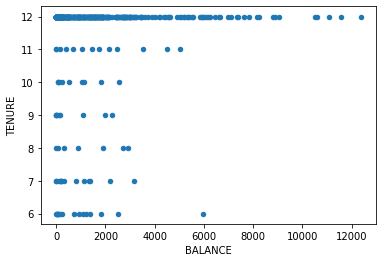

In [57]:
df_sample['BALANCE'] = df_sample['BALANCE'].astype('int64')
df_sample.plot(kind='scatter',x='BALANCE',y='TENURE')

Text(0.5, 1.0, 'Frecuencia Tenure')

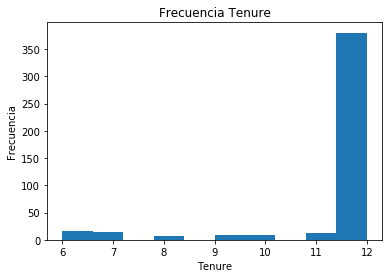

In [58]:
plt.hist(df_sample['TENURE'])
plt.xlabel('Tenure')
plt.ylabel('Frecuencia')
plt.title('Frecuencia Tenure')

Text(0.5, 1.0, 'Frecuencia Balance')

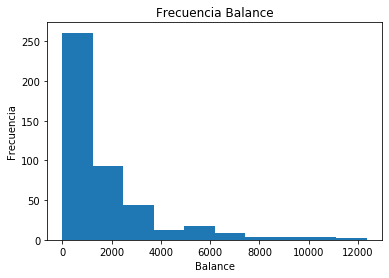

In [59]:
plt.hist(df_sample['BALANCE'])
plt.xlabel('Balance')
plt.ylabel('Frecuencia')
plt.title('Frecuencia Balance')

Text(0.5, 1.0, 'Box Plot de Balance count')

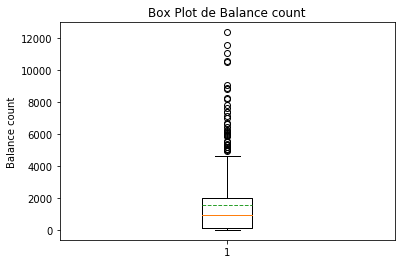

In [60]:
plt.boxplot(df_sample['BALANCE'], showmeans=True, meanline=True)
plt.ylabel('Balance count')
plt.title('Box Plot de Balance count')